In [1]:
import random as random
import time
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.setrecursionlimit(1000000)
plt.style.use("seaborn")


### Autoria: Gabriel Henrique Caetano de Oliveira


In [2]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key


def selection_sort(array):
    for i in range(len(array)):
        min_idx = i
        for j in range(i + 1, len(array)):
            if array[min_idx] >= array[j]:
                min_idx = j
        array[i], array[min_idx] = array[min_idx], array[i]


def shell_sort(array):
    n = len(array)
    interval = n // 2
    while interval > 0:
        for i in range(interval, n):
            temp = array[i]
            j = i
            while j >= interval and array[j - interval] > temp:
                array[j] = array[j - interval]
                j -= interval
            array[j] = temp
        interval //= 2


### Autoria: Gustavo Becelli


In [3]:
def mid_quick_sort(array):
    if len(array) <= 1:
        return array
    pivot = array[len(array) // 2]
    l = [x for x in array[1:] if x <= pivot]
    h = [x for x in array[1:] if x > pivot]
    return mid_quick_sort(l) + [pivot] + mid_quick_sort(h)

def first_quick_sort(array):
    if len(array) <= 1:
        return array
    pivot = array[0]
    l = [x for x in array[1:] if x <= pivot]
    h = [x for x in array[1:] if x > pivot]
    return first_quick_sort(l) + [pivot] + first_quick_sort(h)


def merge(array, l, m, r):
    L = array[l : m + 1]
    R = array[m + 1 : r + 1]

    i, j, k = 0, 0, l

    n1 = m - l + 1
    n2 = r - m

    while i < n1 and j < n2:
        if L[i] <= R[j]:
            array[k] = L[i]
            i += 1
        else:
            array[k] = R[j]
            j += 1
        k += 1

    # Copy remaining elements of L[] or R[], if there
    while i < n1:
        array[k] = L[i]
        i, k = i + 1, k + 1
    while j < n2:
        array[k] = R[j]
        j, k = j + 1, k + 1


def merge_sort(array, l: int = None, r: int = None):
    l = 0 if l is None else l
    r = len(array) - 1 if r is None else r
    if l < r:
        m = l + (r - l) // 2
        merge_sort(array, l, m)
        merge_sort(array, m + 1, r)
        merge(array, l, m, r)
    return array


### Autoria: Gabriel Nozawa


In [4]:
def bubble_sort(array):
    for i in range(len(array)):
        for j in range(1, len(array) - i):
            if array[j] < array[j - 1]:
                temp = array[j]
                array[j] = array[j - 1]
                array[j - 1] = temp
    return array


def optimized_bubble_sort(array):
    for i in range(0, len(array)):
        troca = False
        for j in range(1, len(array) - i):
            if array[j] < array[j - 1]:
                temp = array[j]
                array[j] = array[j - 1]
                array[j - 1] = temp
                troca = True
        if not troca:
            break


# funcao auxiliar do heap sort
def build_max_heap(A, length):
    pai = length // 2 - 1
    for i in range(pai, -1, -1):
        max_heapify(A, i, length)


def max_heapify(A, indice, length):
    pai = indice
    filho = pai * 2 + 1
    while filho < length:
        # verifica se o pai tem 2 filhos ou nao
        if filho + 1 < length:
            # verifica qual dos filhos e o maior
            if A[filho + 1] > A[filho]:
                if A[filho + 1] > A[pai]:
                    aux = A[filho + 1]
                    A[filho + 1] = A[pai]
                    A[pai] = aux
                    pai = filho + 1
                else:
                    break
            else:
                if A[filho] > A[pai]:
                    aux = A[filho]
                    A[filho] = A[pai]
                    A[pai] = aux
                    pai = filho
                else:
                    break
        else:
            if A[filho] > A[pai]:
                aux = A[filho]
                A[filho] = A[pai]
                A[pai] = aux
                pai = filho
            else:
                break
        filho = pai * 2 + 1


def heap_sort(A):
    size = len(A)
    build_max_heap(A, size)
    for i in range(size - 1, 0, -1):
        aux = A[i]
        A[i] = A[0]
        A[0] = aux
        max_heapify(A, 0, i)


### Calculating and plotting stuff


In [5]:
def calculate_elapsed_time(input, function):
    start = time.time()
    function(input.copy())
    return time.time() - start


# regressao linear de 1/3 do array
def linear_behaviour(x, y):
    aux = len(x) // 2
    lin = np.poly1d(np.polyfit(x[:aux], y[:aux], 1))
    return np.poly1d(lin)


# regressao polinomial grau 2 de 1/3 do array
def quadratic_behaviour(x, y):
    aux = len(x) // 2
    sqr = np.polyfit(x[:aux], y[:aux], 2)
    return np.poly1d(sqr)


# regressao nlogn de 1/3 do array
def nlogn_behaviour(x, y):
    temp = []
    for i in range(len(x)):
        temp.append(x[i] * np.log2(x[i]))
    return linear_behaviour(temp, y)


In [6]:
# cria um array com o tempo obtido
def complexity_graph(function, start: int, end: int, step: int = 100, times: int = 1):
    timings = []
    for mode in range(3):
        sizes = []
        timing = []
        for i in range(start, end, step):
            sizes.append(i)  # Tamanho do array
            array = (
                random.sample(range(end), i)
                if mode == 0
                else sorted(random.sample(range(end), i))
                if mode == 1
                else sorted(random.sample(range(end), i), reverse=True)
            )
            sum = 0.0
            for _ in range(times):  # N vezes para obter um tempo médio
                sum += calculate_elapsed_time(array, function)

            avg = sum / times
            timing.append(avg)

        timings.append(timing)

    return sizes, timings


In [7]:
def plot_graphs(sizes, timings):
    plt.figure(figsize=(21, 6))
    for mode in range(3):
        for _ in range(start, end, step):
            plt.subplot(1, 3, mode + 1)
            plt.title(
                f"Modo {'Aleatório' if mode == 0 else 'Crescente' if mode == 1 else 'Decrescente'}"
            )  # Título do gráfico

        p1 = linear_behaviour(sizes, timings[mode])
        p2 = quadratic_behaviour(sizes, timings[mode])
        p3 = nlogn_behaviour(sizes, timings[mode])

        plt.ylim(0, max(timings[mode]) * 1.3)
        plt.plot(sizes, timings[mode], ".", label="amostra")
        plt.plot(sizes, p1(sizes), "b", label="n")
        plt.plot(sizes, p2(sizes), "r", label="n²")
        plt.plot(sizes, p3(sizes * np.log2(sizes)), "g", label="n logn")

        plt.xlabel("Tamanho do array")
        plt.ylabel("Tempo de execução (s)")
        plt.legend()

    plt.show()

def plot_comparison(all_sizes, all_timings, names):
    plt.figure(figsize=(21, 6), dpi=96)

    for mode in range(0, 3):
        for func in range(len(all_timings)):
            plt.subplot(1, 3, mode + 1)
            plt.title(
                f"Modo {'Aleatório' if mode == 0 else 'Crescente' if mode == 1 else 'Decrescente'}"
            )  # Título do gráfico
            plt.plot(all_sizes[func], all_timings[func][mode], label=names[func])
            plt.legend()


In [8]:
data_size = []
timings = []

functions = [
    mid_quick_sort,
    first_quick_sort,
    merge_sort,
    heap_sort,
    shell_sort,
    selection_sort,
    insertion_sort,
    optimized_bubble_sort,
    bubble_sort,
]
names = [
    "Mid Quick Sort",
    "First Quick Sort",
    "Merge Sort",
    "Heap Sort",
    "Shell Sort",
    "Selection Sort",
    "Insertion Sort",
    "Optimized Bubble Sort",
    "Bubble Sort",
]


In [9]:
start = 500
end = 10000
step = 500

In [10]:
all_sizes, all_timings = [], []
for i in range(len(functions)):
    print("Iniciando a de análise de", names[i])
    sizes, timings = complexity_graph(functions[i], start, end, step)
    all_sizes.append(sizes)
    all_timings.append(timings)


Iniciando a de análise de Mid Quick Sort
Iniciando a de análise de First Quick Sort
Iniciando a de análise de Merge Sort
Iniciando a de análise de Heap Sort
Iniciando a de análise de Shell Sort


Mid Quick Sort


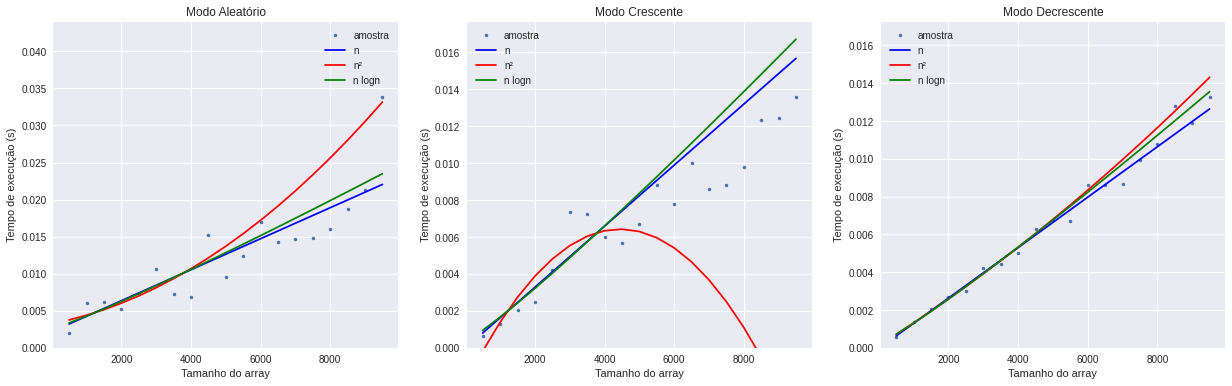

First Quick Sort


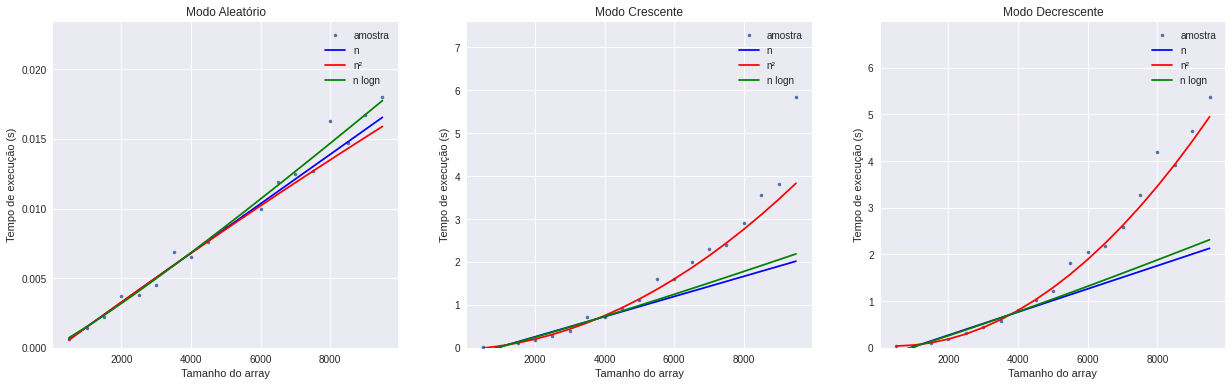

Merge Sort


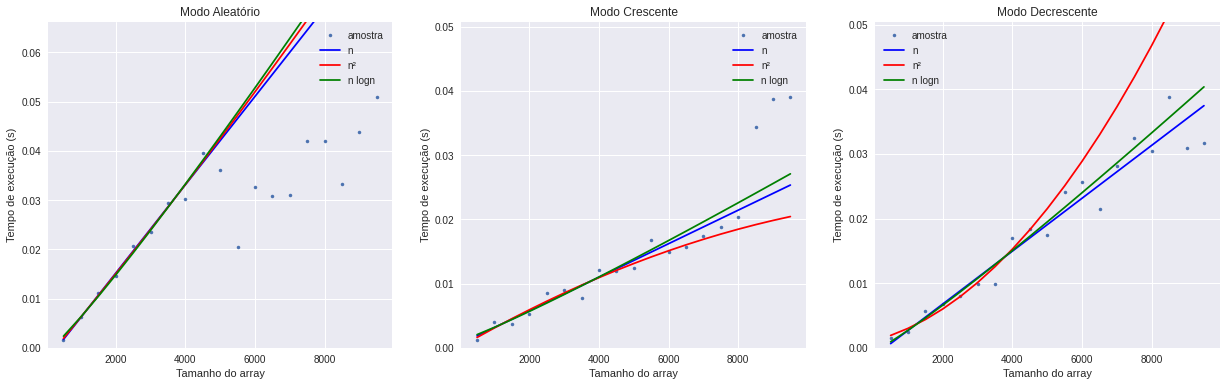

Heap Sort


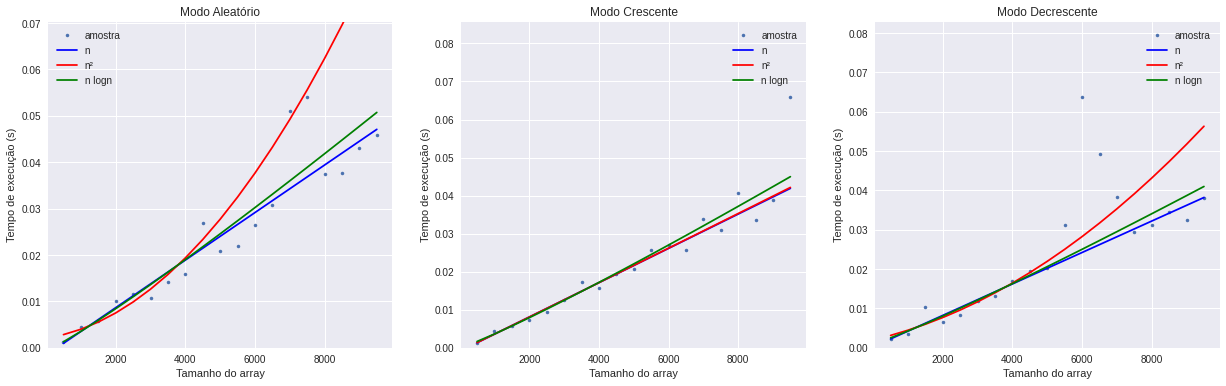

Shell Sort


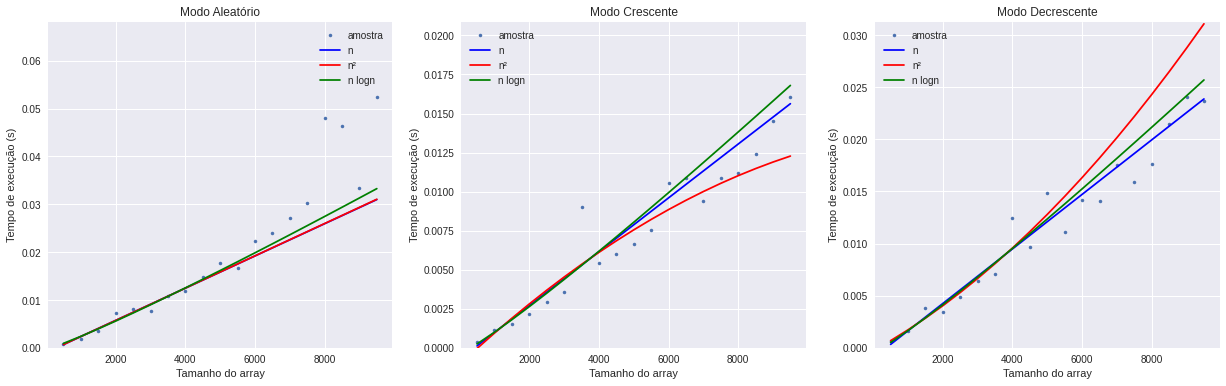

In [11]:
for i in range(len(all_sizes)):
    print(f"{names[i]}")
    plot_graphs(all_sizes[i], all_timings[i])


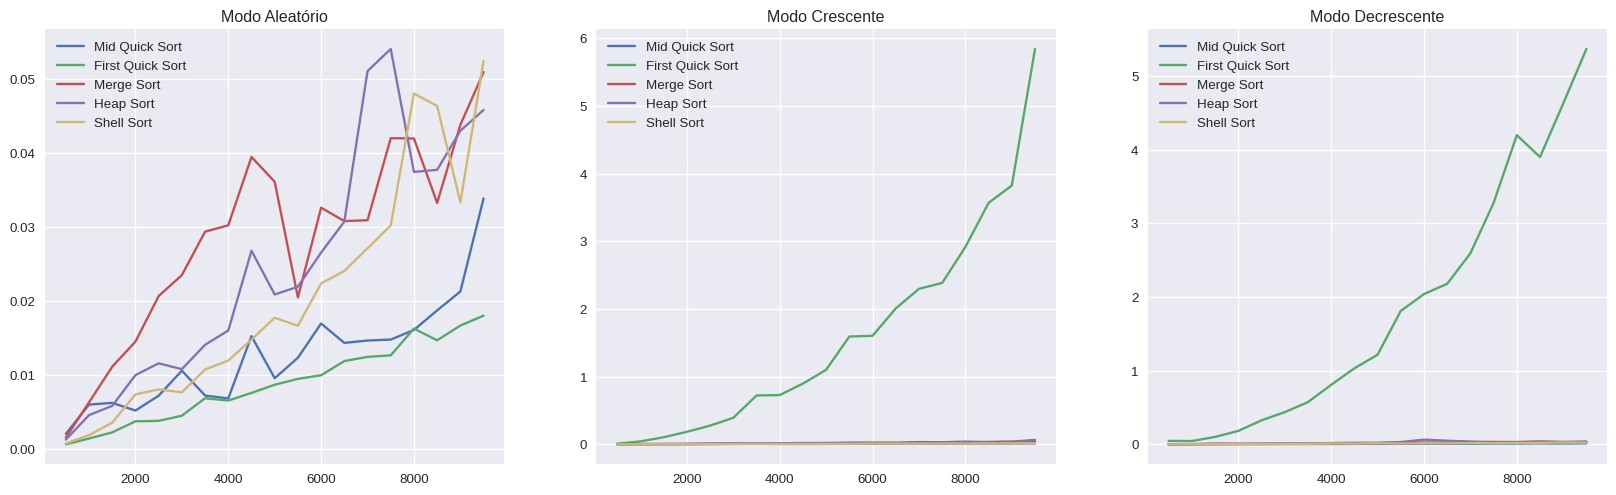

In [12]:
plot_comparison(all_sizes, all_timings, names)


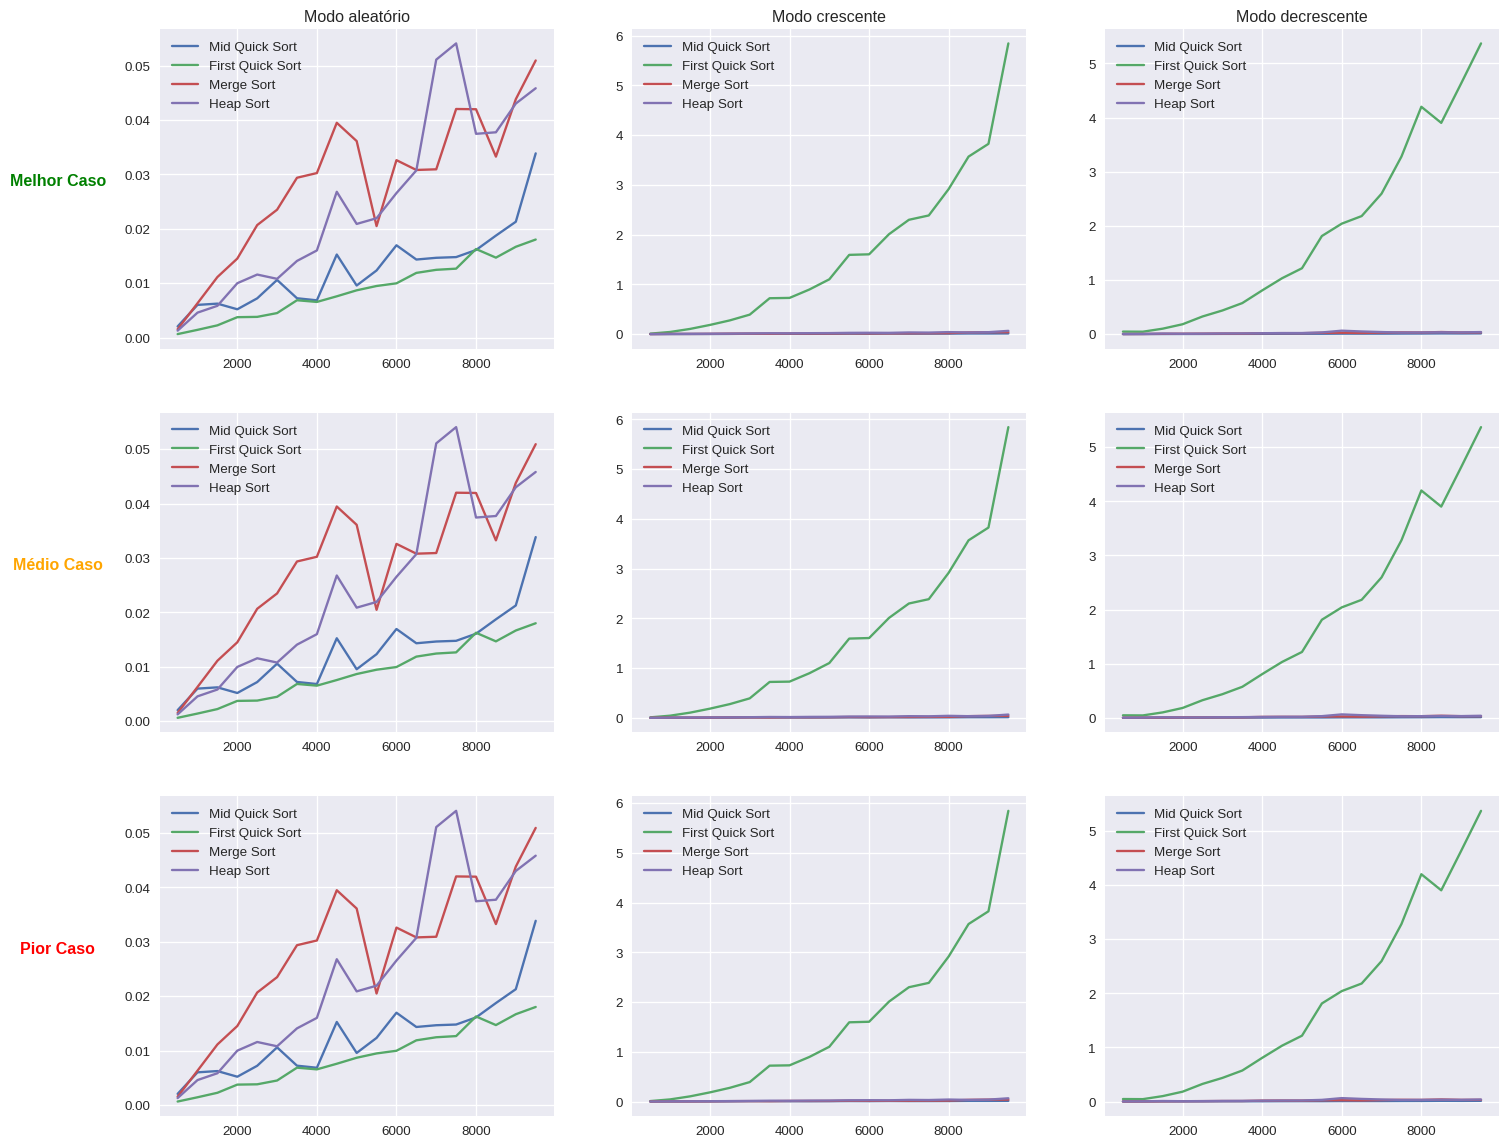

In [13]:
def plot_comparison_cases(all_sizes, all_timings, names):
    plt.figure(figsize=(18, 15), dpi=96)

    # Modo aleatório
    plt.subplot(3, 3, 1)
    plt.ylabel("Melhor Caso", fontsize=12, rotation=0, labelpad=50, fontweight="bold", color="green")
    plt.title("Modo aleatório")
    plt.plot(all_sizes[0], all_timings[0][0], "-", label=names[0])
    plt.plot(all_sizes[1], all_timings[1][0], "-", label=names[1])
    plt.plot(all_sizes[2], all_timings[2][0], "-", label=names[2])
    plt.plot(all_sizes[3], all_timings[3][0], "-", label=names[3])
    # plt.plot(all_sizes[4], all_timings[4][0], "-", label=names[4])
    # plt.plot(all_sizes[5], all_timings[5][0], "-", label=names[5])
    # plt.plot(all_sizes[6], all_timings[6][0], "-", label=names[6])
    # plt.plot(all_sizes[7], all_timings[7][0], "-", label=names[7])
    # plt.plot(all_sizes[8], all_timings[8][0], "-", label=names[8])
    plt.legend()
    
    plt.subplot(3, 3, 2)
    plt.title("Modo crescente")
    plt.plot(all_sizes[0], all_timings[0][1], "-", label=names[0])
    plt.plot(all_sizes[1], all_timings[1][1], "-", label=names[1])
    plt.plot(all_sizes[2], all_timings[2][1], "-", label=names[2])
    plt.plot(all_sizes[3], all_timings[3][1], "-", label=names[3])
    # plt.plot(all_sizes[4], all_timings[4][1], "-", label=names[4])
    # plt.plot(all_sizes[5], all_timings[5][1], "-", label=names[5])
    # plt.plot(all_sizes[6], all_timings[6][1], "-", label=names[6])
    # plt.plot(all_sizes[7], all_timings[7][1], "-", label=names[7])
    # plt.plot(all_sizes[8], all_timings[8][1], "-", label=names[8])
    plt.legend()
    
    plt.subplot(3, 3, 3)
    plt.title("Modo decrescente")
    plt.plot(all_sizes[0], all_timings[0][2], "-", label=names[0])
    plt.plot(all_sizes[1], all_timings[1][2], "-", label=names[1])
    plt.plot(all_sizes[2], all_timings[2][2], "-", label=names[2])
    plt.plot(all_sizes[3], all_timings[3][2], "-", label=names[3])
    # plt.plot(all_sizes[4], all_timings[4][2], "-", label=names[4])
    # plt.plot(all_sizes[5], all_timings[5][2], "-", label=names[5])
    # plt.plot(all_sizes[6], all_timings[6][2], "-", label=names[6])
    # plt.plot(all_sizes[7], all_timings[7][2], "-", label=names[7])
    # plt.plot(all_sizes[8], all_timings[8][2], "-", label=names[8])
    
    ######################################################################################################################
    plt.legend()
# Modo aleatório
    plt.subplot(3, 3, 4)
    plt.ylabel("Médio Caso", fontsize=12, rotation=0, labelpad=50, fontweight="bold", color="orange")
    plt.plot(all_sizes[0], all_timings[0][0], "-", label=names[0])
    plt.plot(all_sizes[1], all_timings[1][0], "-", label=names[1])
    plt.plot(all_sizes[2], all_timings[2][0], "-", label=names[2])
    plt.plot(all_sizes[3], all_timings[3][0], "-", label=names[3])
    # plt.plot(all_sizes[4], all_timings[4][0], "-", label=names[4])
    # plt.plot(all_sizes[5], all_timings[5][0], "-", label=names[5])
    # plt.plot(all_sizes[6], all_timings[6][0], "-", label=names[6])
    # plt.plot(all_sizes[7], all_timings[7][0], "-", label=names[7])
    # plt.plot(all_sizes[8], all_timings[8][0], "-", label=names[8])
    plt.legend()
    
    plt.subplot(3, 3, 5)
    plt.plot(all_sizes[0], all_timings[0][1], "-", label=names[0])
    plt.plot(all_sizes[1], all_timings[1][1], "-", label=names[1])
    plt.plot(all_sizes[2], all_timings[2][1], "-", label=names[2])
    plt.plot(all_sizes[3], all_timings[3][1], "-", label=names[3])
    # plt.plot(all_sizes[4], all_timings[4][1], "-", label=names[4])
    # plt.plot(all_sizes[5], all_timings[5][1], "-", label=names[5])
    # plt.plot(all_sizes[6], all_timings[6][1], "-", label=names[6])
    # plt.plot(all_sizes[7], all_timings[7][1], "-", label=names[7])
    # plt.plot(all_sizes[8], all_timings[8][1], "-", label=names[8])
    plt.legend()
    
    plt.subplot(3, 3, 6)
    plt.plot(all_sizes[0], all_timings[0][2], "-", label=names[0])
    plt.plot(all_sizes[1], all_timings[1][2], "-", label=names[1])
    plt.plot(all_sizes[2], all_timings[2][2], "-", label=names[2])
    plt.plot(all_sizes[3], all_timings[3][2], "-", label=names[3])
    # plt.plot(all_sizes[4], all_timings[4][2], "-", label=names[4])
    # plt.plot(all_sizes[5], all_timings[5][2], "-", label=names[5])
    # plt.plot(all_sizes[6], all_timings[6][2], "-", label=names[6])
    # plt.plot(all_sizes[7], all_timings[7][2], "-", label=names[7])
    # plt.plot(all_sizes[8], all_timings[8][2], "-", label=names[8])
    plt.legend()
    #################################################################################################################################################################################
    # Modo aleatório
    plt.subplot(3, 3, 7)
    plt.ylabel("Pior Caso", fontsize=12, rotation=0, labelpad=50, fontweight="bold", color="red")
    plt.plot(all_sizes[0], all_timings[0][0], "-", label=names[0])
    plt.plot(all_sizes[1], all_timings[1][0], "-", label=names[1])
    plt.plot(all_sizes[2], all_timings[2][0], "-", label=names[2])
    plt.plot(all_sizes[3], all_timings[3][0], "-", label=names[3])
    # plt.plot(all_sizes[4], all_timings[4][0], "-", label=names[4])
    # plt.plot(all_sizes[5], all_timings[5][0], "-", label=names[5])
    # plt.plot(all_sizes[6], all_timings[6][0], "-", label=names[6])
    # plt.plot(all_sizes[7], all_timings[7][0], "-", label=names[7])
    # plt.plot(all_sizes[8], all_timings[8][0], "-", label=names[8])
    plt.legend()
    
    plt.subplot(3, 3, 8)
    plt.plot(all_sizes[0], all_timings[0][1], "-", label=names[0])
    plt.plot(all_sizes[1], all_timings[1][1], "-", label=names[1])
    plt.plot(all_sizes[2], all_timings[2][1], "-", label=names[2])
    plt.plot(all_sizes[3], all_timings[3][1], "-", label=names[3])
    # plt.plot(all_sizes[4], all_timings[4][1], "-", label=names[4])
    # plt.plot(all_sizes[5], all_timings[5][1], "-", label=names[5])
    # plt.plot(all_sizes[6], all_timings[6][1], "-", label=names[6])
    # plt.plot(all_sizes[7], all_timings[7][1], "-", label=names[7])
    # plt.plot(all_sizes[8], all_timings[8][1], "-", label=names[8])
    plt.legend()
    
    plt.subplot(3, 3, 9)
    plt.plot(all_sizes[0], all_timings[0][2], "-", label=names[0])
    plt.plot(all_sizes[1], all_timings[1][2], "-", label=names[1])
    plt.plot(all_sizes[2], all_timings[2][2], "-", label=names[2])
    plt.plot(all_sizes[3], all_timings[3][2], "-", label=names[3])
    # plt.plot(all_sizes[4], all_timings[4][2], "-", label=names[4])
    # plt.plot(all_sizes[5], all_timings[5][2], "-", label=names[5])
    # plt.plot(all_sizes[6], all_timings[6][2], "-", label=names[6])
    # plt.plot(all_sizes[7], all_timings[7][2], "-", label=names[7])
    # plt.plot(all_sizes[8], all_timings[8][2], "-", label=names[8])
    plt.legend()
plot_comparison_cases(all_sizes, all_timings, names)